In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option("display.max_colwidth", 200)

import altair as alt

In [2]:
rental_data_hour = pd.read_csv("hour.csv")

In [3]:
rental_data_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [4]:
rental_data_hour_new = rental_data_hour.drop(['instant','dteday','yr'], axis = 1)

## Applying pandas profiling to get summary of the data

In [11]:
profile = ProfileReport(rental_data_hour_new)

In [12]:
profile

In [14]:
rental_data_hour_new.describe()

season          mnth            hr       holiday       weekday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      6.537775     11.546752      0.028770      3.003683   
std        1.106918      3.438776      6.914405      0.167165      2.005771   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        2.000000      4.000000      6.000000      0.000000      1.000000   
50%        3.000000      7.000000     12.000000      0.000000      3.000000   
75%        3.000000     10.000000     18.000000      0.000000      5.000000   
max        4.000000     12.000000     23.000000      1.000000      6.000000   

         workingday    weathersit          temp         atemp           hum  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.682721      1.425283      0.496987      0.475775      0.627229   
std        0.465431      0.639357      0.192556      0.171850      0.192930   
min        0.000000      1.000000      0.020000      0.000000      0.000000   
25%        0.000000      1.000000      0.340000      0.333300      0.480000   
50%        1.000000      1.000000      0.500000      0.484800      0.630000   
75%        1.000000      2.000000      0.660000      0.621200      0.780000   
max        1.000000      4.000000      1.000000      1.000000      1.000000   

          windspeed        casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.190098     35.676218    153.786869    189.463088  
std        0.122340     49.305030    151.357286    181.387599  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.104500      4.000000     34.000000     40.000000  
50%        0.194000     17.000000    115.000000    142.000000  
75%        0.253700     48.000000    220.000000    281.000000  
max        0.850700    367.000000    886.000000    977.000000

## Checking the Null Values in the dataset

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)})

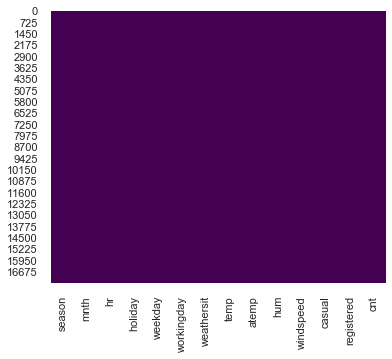

In [20]:
sns.heatmap(rental_data_hour_new.isnull(), cmap='viridis', cbar=False)

# Analysis of temp on bike rental count 

In [5]:
#alt.data_transformers.enable('json')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [19]:
rental_data_hour_new['temp_actual'] = rental_data_hour_new['temp'].apply(lambda x: x*47 - 8)

In [20]:
rental_data_hour_new.head()

season  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp  \
0       1     1   0        0        6           0           1  0.24  0.2879   
1       1     1   1        0        6           0           1  0.22  0.2727   
2       1     1   2        0        6           0           1  0.22  0.2727   
3       1     1   3        0        6           0           1  0.24  0.2879   
4       1     1   4        0        6           0           1  0.24  0.2879   

    hum  windspeed  casual  registered  cnt  temp_actual  
0  0.81        0.0       3          13   16         3.28  
1  0.80        0.0       8          32   40         2.34  
2  0.80        0.0       5          27   32         2.34  
3  0.75        0.0       3          10   13         3.28  
4  0.75        0.0       0           1    1         3.28

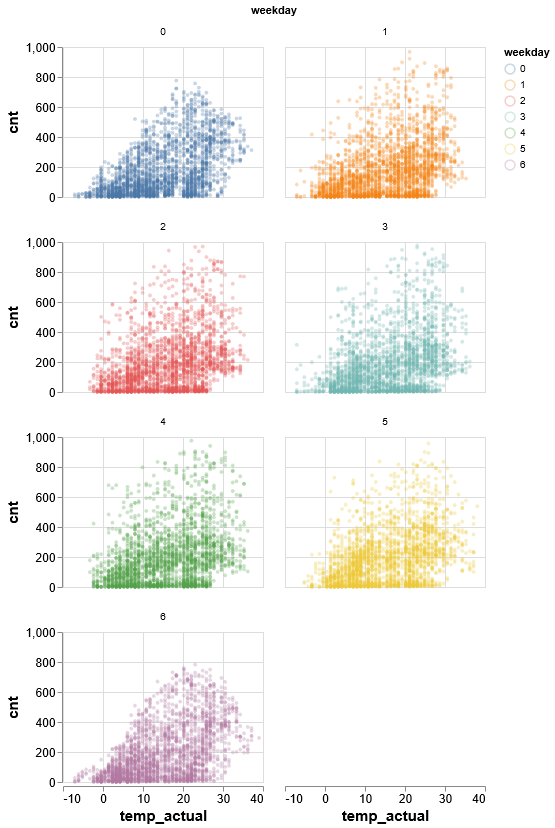

In [27]:
chart = alt.Chart(rental_data_hour_new).mark_point(opacity=0.3, size = 4).encode(
            alt.X('temp_actual:Q'),
            alt.Y('cnt:Q'),
            color = 'weekday:N'
        ).properties(title="Temp vs Bike Rental",
                    width=200, height=150).facet(
    facet='weekday:N',
    columns=2
).configure_axisX(labelFontSize=12,
    titleFontSize=15).configure_axisY(labelFontSize=12,
    titleFontSize=15).configure_title(fontSize=17)
chart